In [1]:
import yfinance as yf
import mplfinance as mpl
import matplotlib as plt
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')


In [3]:
df['stock'].nunique()


6204

In [4]:
df['headline_len'] = df['headline'].astype(str).str.split().str.len()
df['headline_len'].describe()

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_len, dtype: float64

In [5]:
df['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

<Axes: xlabel='publisher'>

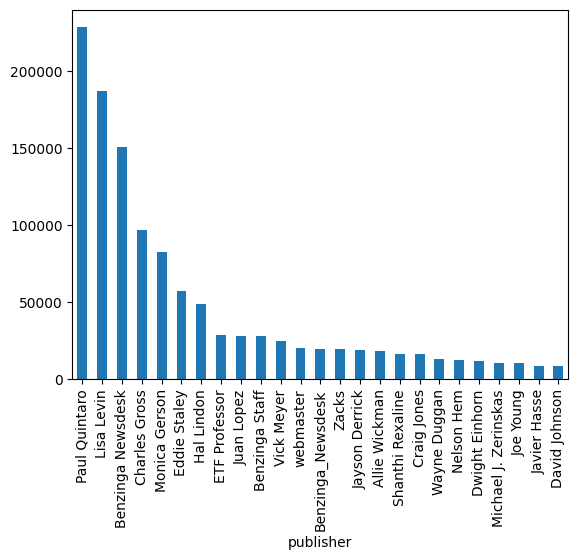

In [6]:
df['publisher'].value_counts().head(25).plot(kind='bar')


In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])



In [8]:
df['date'].isna().sum()


np.int64(0)

In [9]:
df['headline_length'] = df['headline'].str.len()
df['headline_length'].describe()


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

<Axes: xlabel='date'>

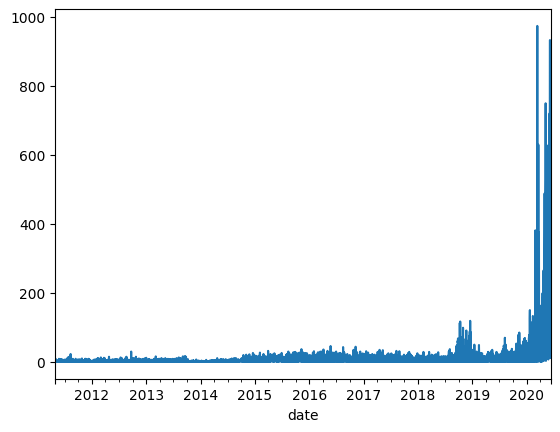

In [10]:
df.set_index('date').resample('D').size().plot()


In [11]:
import string
df['clean_headline'] = df['headline'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

In [13]:
import nltk



In [14]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))



In [ ]:
import string
df['clean_headline'] = df['headline'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df['clean_headline'] = df['clean_headline'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


In [18]:
from collections import Counter
all_words = ' '.join(df['clean_headline']).split()
word_counts = Counter(all_words)
word_counts.most_common(20)

[('stocks', 12796),
 ('shares', 8374),
 ('52week', 8249),
 ('trading', 6573),
 ('hit', 5898),
 ('eps', 5530),
 ('price', 5043),
 ('companies', 4778),
 ('target', 4675),
 ('several', 4650),
 ('sales', 4422),
 ('higher', 4269),
 ('market', 4025),
 ('estimate', 3818),
 ('lows', 3741),
 ('us', 3411),
 ('session', 3394),
 ('maintains', 3266),
 ('new', 3107),
 ('yesterday', 3049)]

In [19]:
from nltk import ngrams

bigrams = ngrams(all_words, 2)
bigram_counts = Counter(bigrams)
bigram_counts.most_common(20)


[(('stocks', 'hit'), 5847),
 (('hit', '52week'), 5846),
 (('price', 'target'), 4585),
 (('shares', 'several'), 4438),
 (('companies', 'trading'), 4082),
 (('52week', 'lows'), 3687),
 (('trading', 'higher'), 3516),
 (('stocks', 'moving'), 2841),
 (('52week', 'highs'), 2558),
 (('trading', 'lower'), 2152),
 (('new', '52week'), 2094),
 (('stocks', 'set'), 2057),
 (('set', 'new'), 2057),
 (('raises', 'price'), 1911),
 (('biggest', 'movers'), 1890),
 (('lowers', 'price'), 1769),
 (('lows', 'thursday'), 1764),
 (('52week', 'low'), 1736),
 (('q1', 'eps'), 1675),
 (('estimate', 'sales'), 1538)]

In [20]:
df = df.set_index('date')
daily_counts = df.resample('D').size()

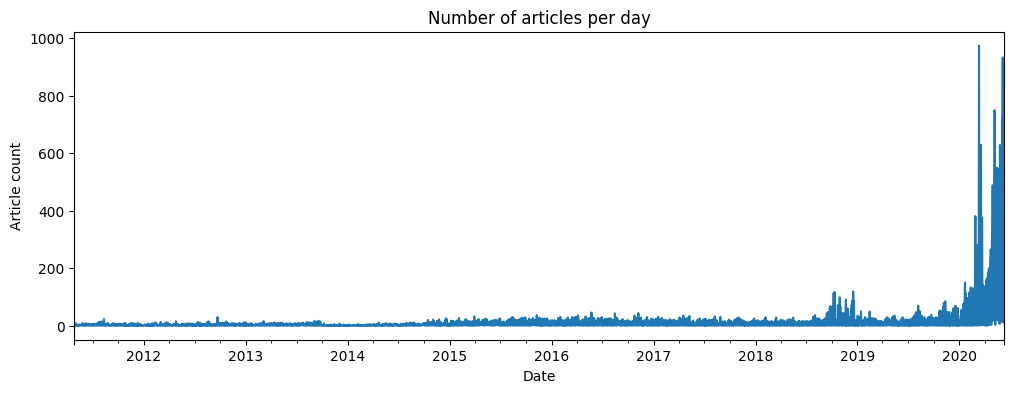

In [22]:
publisher_counts = df['publisher'].value_counts()

In [23]:
top_pub = publisher_counts.index[0]
df[df['publisher'] == top_pub]['clean_headline'].head(10)


date
2020-05-22 09:07:04-04:00    agilent technologies shares trading higher com...
2020-06-08 11:29:29-04:00    alcoa seeing better july aluminum shipments am...
2019-10-25 16:09:59-04:00                           aac holdings shares halted
2019-08-30 09:24:01-04:00    aac shares trading lower company reported wors...
2020-06-10 11:21:01-04:00    international air travel us airlines fell 99 a...
2020-06-10 10:35:12-04:00    american airlines ceo says demand returning lo...
2020-06-10 10:28:47-04:00    american airlines ceo says sees june cash burn...
2020-06-10 10:24:00-04:00    american air says continuing extremely product...
2020-06-10 08:58:01-04:00    sec mnuchin add treasury approved 27 billion 5...
2020-06-09 08:42:15-04:00    intl air transport association says airlines n...
Name: clean_headline, dtype: object

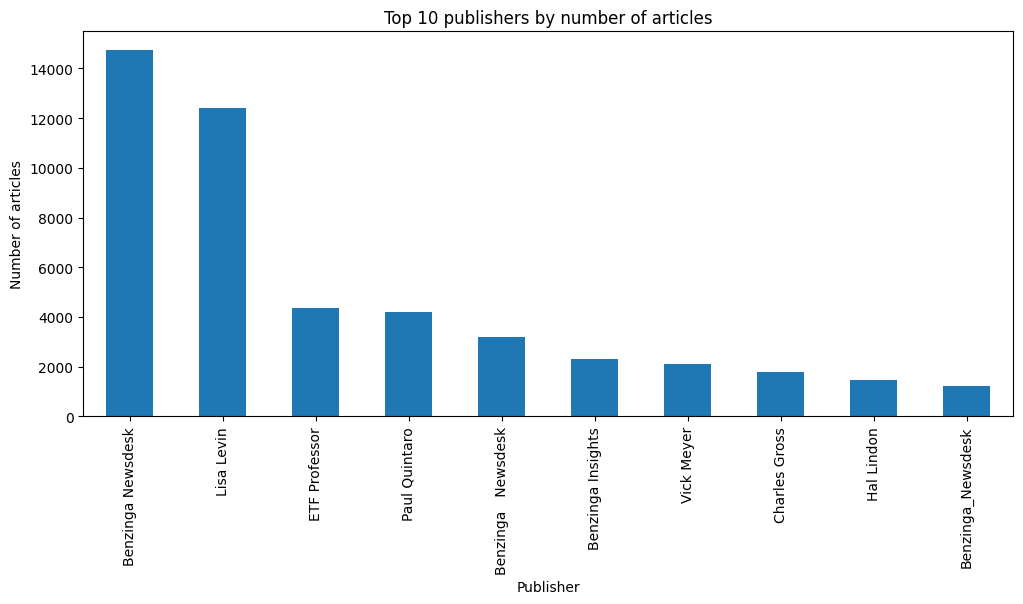

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 publishers by number of articles")
plt.xlabel("Publisher")
plt.ylabel("Number of articles")
plt.show()
